In [ ]:
import os
import cv2 #computer vision : to load images and process images
import numpy as np
import matplotlib.pyplot as plt #vizualization of the actual digits
import tensorflow as tf #

In [ ]:
mnist = tf.keras.datasets.mnist

In [ ]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()
 # x being the pixel data and y being the classification data.
#the mnist.load() function is going to return two tuples .

In [ ]:
#Now we will normalize it , which means evry value is between 0 and 1.
#We only want to normalize the pixel data.
x_train = tf.keras.utils.normalize(x_train,axis=1)
x_test = tf .keras.utils.normalize(x_test,axis=1);

In [ ]:
#creating a neural network model
model = tf.keras.models.Sequential()
#we need to add layers to the model
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))     #here if the image is of the dimension 28,28,the flatten function will make it as single flat layer of 784 pixels.
model.add(tf.keras.layers.Dense(128,activation='relu'))       #relu= rectified linear unit
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(10,activation='softmax'))      # it has 10 units because it is a output layer ,And we want to represent indivual 10 digits.
# softmax gives us probablity for each uni

In [ ]:
#Now lets compile the model
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
#train the model
model.fit(x_train, y_train, epochs=3) # epoch is the times the model will see the same data again.

#save the model
model.save('handwritten.model')

Epoch 1/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2615 - accuracy: 0.9232
Epoch 2/3
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1077 - accuracy: 0.9667
Epoch 3/3
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0741 - accuracy: 0.9771


In [ ]:
loss , accuracy = model.evaluate(x_test, y_test)
print(loss)
print(accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.0927 - accuracy: 0.9720
0.09270472079515457
0.972000002861023


1/1 [==============================] - 0s 62ms/step
the digit is probably a 4


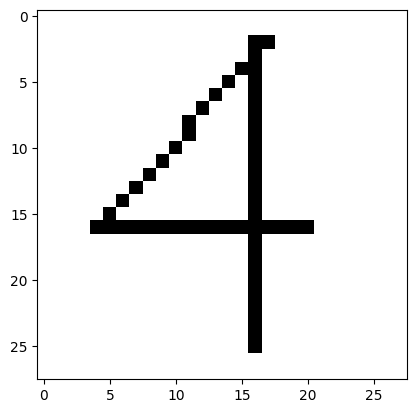

1/1 [==============================] - 0s 19ms/step
the digit is probably a 7


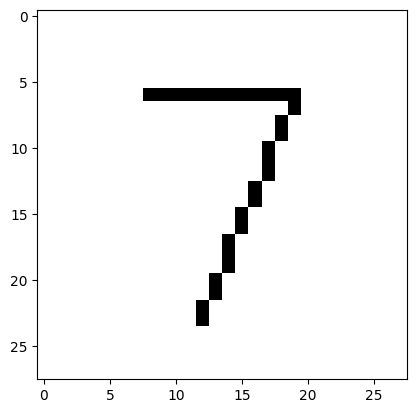

1/1 [==============================] - 0s 19ms/step
the digit is probably a 6


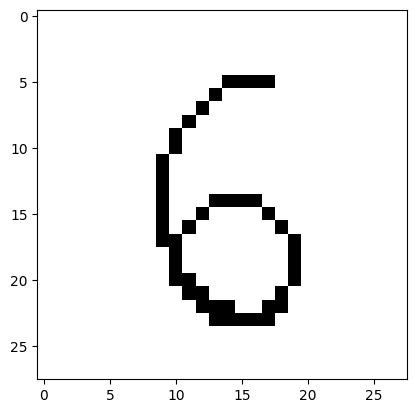

1/1 [==============================] - 0s 20ms/step
the digit is probably a 3


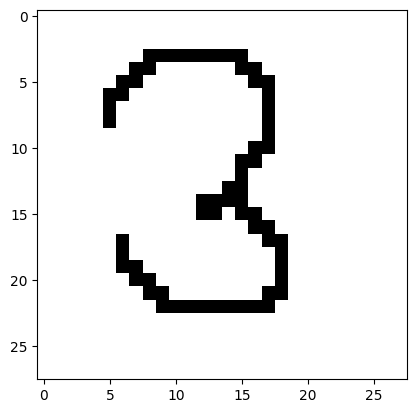

1/1 [==============================] - 0s 23ms/step
the digit is probably a 2


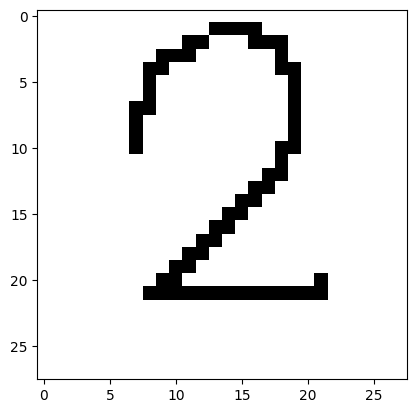

In [ ]:
#Read the image
image_number=1;
while os.path.isfile(f"digit{image_number}.png"):
  try:
    img = cv2.imread(f"digit{image_number}.png")[:,:,0]
    img = np.invert(np.array([img]))
    prediction = model.predict(img)
    print(f"the digit is probably a {np.argmax(prediction)}")
    plt.imshow(img[0],cmap=plt.cm.binary)
    plt.show()
  except:
    print("Error!")
  finally:
    image_number += 1